# Nicholas Colonna
## Homework 2
### "I pledge my honor that I have abided by the Stevens Honor System."

We will now try to predict per capita crime rate (crim) using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

In [37]:
import pandas as pd
import numpy as np
import pylab as pl
from sklearn.datasets import load_boston
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


1. For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. 

After running a simple linear regression model for each variable, I was able to identify that the variables INDUS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B and LSTAT were statistically significant. This can be seen by a p-value < 0.05. This means that ZN and CHAS were not significant. You can see this in the first plot below. The next 3 plots show the data and regression function for ZN and CHAS, our two variables that weren't significant, as well as one from LSTAT, a significant variable, for comparison. You can see that the line is not a great fit for ZN because of the many zeros in the data, and you can see that CHAS is a classification variable, and thus, a linear function would not be a great fit. In comparison, the line for LSTAT reasonably follows the trend of the data and therefore has some significance.

   variable  p-values
0        ZN   0.93130
1     INDUS   0.00000
2      CHAS   0.23970
3       NOX   0.00000
4        RM   0.00000
5       AGE   0.00000
6       DIS   0.00014
7       RAD   0.00000
8       TAX   0.00000
9   PTRATIO   0.00000
10        B   0.00000
11    LSTAT   0.00000


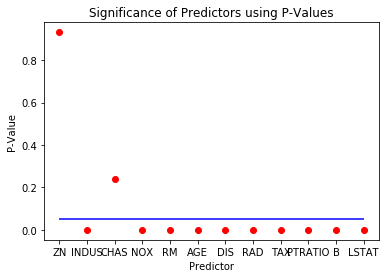

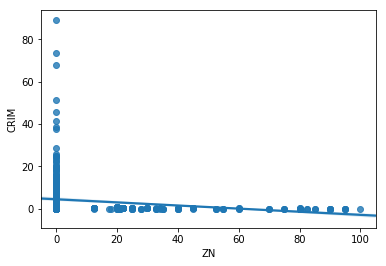

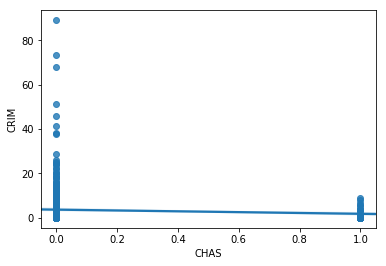

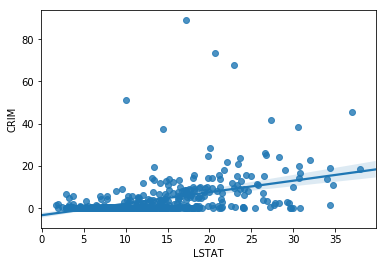

In [38]:
features = ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
y = df.CRIM

pvals = []
for name in features:
    pvals.append(round(sm.OLS(y, df[[name]]).fit().pvalues[0],5))

r = {'variable':features, 'p-values':pvals}    
results = pd.DataFrame(data=r)
print(results)

plt.plot(results['variable'], results['p-values'], "ro")
plt.hlines(0.05,'ZN','LSTAT', 'b')
plt.xlabel('Predictor')
plt.ylabel('P-Value')
plt.title('Significance of Predictors using P-Values')
plt.show()

plt.figure()
zn_plot = sns.regplot(x='ZN', y='CRIM', data=df, ci=95)
plt.figure()
chas_plot = sns.regplot(x='CHAS', y='CRIM', data=df, ci=95)
plt.figure()
dis_plot = sns.regplot(x='LSTAT', y='CRIM', data=df, ci=95)

2. Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0: βj = 0?

As seen from the summary of this regression, I was able to identify the significant variables (p-value < 0.05) where we reject the null hypothesis, which included ZN, DIS, RAD, B and LSTAT. Another thing I noticed from the regression is that it has a very large condition number, which usually indicates strong multicollinearity in the model.

In [39]:
X = ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
lm = sm.OLS(y, df[X]).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     44.24
Date:                Wed, 03 Oct 2018   Prob (F-statistic):           1.61e-70
Time:                        13:13:02   Log-Likelihood:                -1662.3
No. Observations:                 506   AIC:                             3349.
Df Residuals:                     494   BIC:                             3399.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ZN             0.0373      0.019      1.978      0.049       0.000       0.074
INDUS         -0.0745      0.085     -0.881      0.379      -0.241       0.092
CHAS          -1.2628      1.186     -1.065      0.287      -3.593       1.067
NOX           -3.0300      4.410     -0.687      0.492     -11.694       5.634
RM             0.2184      0.406      0.538      0.591      -0.579       1.016
AGE           -0.0004      0.018     -0.020      0.984      -0.036       0.035
DIS           -0.5745      0.256     -2.247      0.025      -1.077      -0.072
RAD            0.5033      0.085      5.944      0.000       0.337       0.670
TAX           -0.0005      0.005     -0.094      0.925      -0.011       0.010
PTRATIO        0.0690      0.144      0.478      0.633      -0.214       0.352
B             -0.0074      0.004     -2.089      0.037      -0.014      -0.000
LSTAT          0.2629      0.066      4.007      0.000       0.134       0.392
==============================================================================
Omnibus:                      676.980   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91159.699
Skew:                           6.788   Prob(JB):                         0.00
Kurtosis:                      67.339   Cond. No.                     8.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

3. How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

The results were interesting because ZN wasn't significant on its own, yet it became significant when run with other variables. The opposite can be said about INDUS, NOX, RM, AGE, TAX and PTRATIO, which were significant on their own but not when grouped with all variables. The variable CHAS was not significant in both regressions.

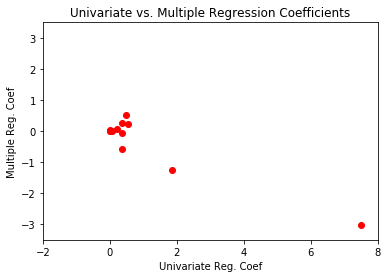

In [40]:
m_coefs = lm.params.values
u_coefs = []
for name in features:
    u_coefs.append(sm.OLS(y, df[[name]]).fit().params.values[0])

c = {'variable':X, 'univar_coefs':u_coefs, 'mult_coefs':m_coefs}    
coefs = pd.DataFrame(data=c)

plt.plot(coefs['univar_coefs'], coefs['mult_coefs'], 'ro')
plt.axis([-2,8,-3.5,3.5])
plt.xlabel('Univariate Reg. Coef')
plt.ylabel('Multiple Reg. Coef')
plt.title('Univariate vs. Multiple Regression Coefficients')
plt.show()

4. Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form:   Y = β0 + β1X + β2X2 + β3X3 + e.

After fitting polynomial models for all of the predictors, it became evident that there were a few predictors that show evidence of a non-linear association with CRIM. Those variables include INDUS, NOX, DIS and PTRATIO, since the p-values for X, X^2, and X^3 are all significant for each variable. There was also the variable AGE, which was not significant when looking at linear relationship X, but X^2 and X^3 showed significance. This means there are non-linear associations between the predictor and response.

In [41]:
zn = smf.ols('CRIM ~ ZN + np.power(ZN,2) + np.power(ZN,3)', data=df).fit()
indus = smf.ols('CRIM ~ INDUS + np.power(INDUS,2) + np.power(INDUS,3)', data=df).fit()
chas = smf.ols('CRIM ~ CHAS + np.power(CHAS,2) + np.power(CHAS,3)', data=df).fit()
nox = smf.ols('CRIM ~ NOX + np.power(NOX,2) + np.power(NOX,3)', data=df).fit()
rm = smf.ols('CRIM ~ RM + np.power(RM,2) + np.power(RM,3)', data=df).fit()
age = smf.ols('CRIM ~ AGE + np.power(AGE,2) + np.power(AGE,3)', data=df).fit()
dis = smf.ols('CRIM ~ DIS + np.power(DIS,2) + np.power(DIS,3)', data=df).fit()
rad = smf.ols('CRIM ~ RAD + np.power(RAD,2) + np.power(RAD,3)', data=df).fit()
tax = smf.ols('CRIM ~ TAX + np.power(TAX,2) + np.power(TAX,3)', data=df).fit()
ptratio = smf.ols('CRIM ~ PTRATIO + np.power(PTRATIO,2) + np.power(PTRATIO,3)', data=df).fit()
b = smf.ols('CRIM ~ B + np.power(B,2) + np.power(B,3)', data=df).fit()
lstat = smf.ols('CRIM ~ LSTAT + np.power(LSTAT,2) + np.power(LSTAT,3)', data=df).fit()


print(round(zn.pvalues,5))
print()
print(round(indus.pvalues,5))
print()
print(round(chas.pvalues,5))
print()
print(round(nox.pvalues,5))
print()
print(round(rm.pvalues,5))
print()
print(round(age.pvalues,5))
print()
print(round(dis.pvalues,5))
print()
print(round(rad.pvalues,5))
print()
print(round(tax.pvalues,5))
print()
print(round(ptratio.pvalues,5))
print()
print(round(b.pvalues,5))
print()
print(round(lstat.pvalues,5))

Intercept          0.00000
ZN                 0.00276
np.power(ZN, 2)    0.09563
np.power(ZN, 3)    0.23222
dtype: float64

Intercept             0.02128
INDUS                 0.00006
np.power(INDUS, 2)    0.00000
np.power(INDUS, 3)    0.00000
dtype: float64

Intercept            0.00000
CHAS                 0.21434
np.power(CHAS, 2)    0.21434
np.power(CHAS, 3)    0.21434
dtype: float64

Intercept           0.0
NOX                 0.0
np.power(NOX, 2)    0.0
np.power(NOX, 3)    0.0
dtype: float64

Intercept          0.08318
RM                 0.21659
np.power(RM, 2)    0.37275
np.power(RM, 3)    0.52068
dtype: float64

Intercept           0.35609
AGE                 0.14201
np.power(AGE, 2)    0.04742
np.power(AGE, 3)    0.00678
dtype: float64

Intercept           0.0
DIS                 0.0
np.power(DIS, 2)    0.0
np.power(DIS, 3)    0.0
dtype: float64

Intercept           0.76874
RAD                 0.62487
np.power(RAD, 2)    0.61478
np.power(RAD, 3)    0.48511
dtype: float64

Inte